In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
df=pd.read_csv("clean_data.csv")

In [4]:
df.head()

,Country Name,1990_gdp,1991_gdp,1992_gdp,1993_gdp,1994_gdp,1995_gdp,1996_gdp,1997_gdp,1998_gdp,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020_urbanization
0,China,394.57,413.37,493.14,619.11,564.32,734.49,863.75,961.60,1029.06,...,50.511,51.765,53.013,54.259,55.500,56.736,57.960,59.152,60.308,61.428
1,Germany,1771.67,1868.95,2131.57,2071.32,2205.07,2585.79,2497.24,2211.99,2238.99,...,77.160,77.170,77.180,77.190,77.200,77.224,77.261,77.312,77.376,77.453
2,India,320.98,270.11,288.21,279.30,327.28,360.28,392.90,415.87,421.35,...,31.276,31.634,32.003,32.384,32.777,33.182,33.600,34.030,34.472,34.926
3,Japan,3185.90,3648.07,3980.70,4536.94,4998.80,5545.56,4923.39,4492.45,4098.36,...,91.069,91.148,91.226,91.304,91.381,91.457,91.535,91.616,91.698,91.782
4,United States,5963.14,6158.13,6520.33,6858.56,7287.24,7639.75,8073.12,8577.55,9062.82,...,80.944,81.119,81.299,81.483,81.671,81.862,82.058,82.256,82.459,82.664


In [5]:
l=df.columns.tolist

In [6]:
print(l)

<bound method IndexOpsMixin.tolist of Index(['Country Name', '1990_gdp', '1991_gdp', '1992_gdp', '1993_gdp',
       '1994_gdp', '1995_gdp', '1996_gdp', '1997_gdp', '1998_gdp',
       ...
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020_urbanization'],
      dtype='object', length=155)>


In [7]:
cons=pd.read_csv("eleccons.csv")
gdp=pd.read_csv("gdp.csv")
hdi=pd.read_csv("hdi.csv")
ind=pd.read_csv("industrial_production.csv")
popu=pd.read_csv("population.csv")
urb=pd.read_csv("urbanization.csv")

In [8]:
cons.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Germany,481.001,481.055,475.878,467.164,465.073,472.579,479.658,482.877,487.477,...,539.891,538.206,536.440,524.826,528.350,530.551,531.318000,521.809000,507.543000,492.822000
1,Japan,774.858,798.326,806.203,813.674,866.615,884.005,904.371,915.292,924.781,...,1011.723,1006.624,1005.232,988.675,964.657,966.004,980.186191,961.064364,942.136557,921.409901
2,United States,2712.555,2854.260,2865.559,2963.142,3047.324,3135.807,3221.305,3270.628,3373.860,...,3885.019,3830.933,3871.735,3895.216,3895.365,3922.011,3886.956078,4042.840012,3964.472686,3903.674412
3,China,507.054,581.211,644.977,715.634,797.800,848.435,915.940,952.637,986.454,...,4051.605,4326.079,4717.568,5057.927,5098.165,5389.393,5880.106225,6439.154225,6807.714225,7110.690568
4,India,211.766,232.033,247.451,266.146,289.566,309.667,315.045,334.381,351.049,...,789.133,831.419,883.046,970.454,1022.223,1085.748,1149.182064,1233.017977,1271.951473,1187.127410


In [9]:
# Selecting India from each dataframe
india_cons = cons[cons['Country Name'] == 'India'].transpose().reset_index()
india_gdp = gdp[gdp['Country Name'] == 'India'].transpose().reset_index()
india_hdi = hdi[hdi['Country Name'] == 'India'].transpose().reset_index()
india_ind = ind[ind['Country Name'] == 'India'].transpose().reset_index()
india_popu = popu[popu['Country Name'] == 'India'].transpose().reset_index()
india_urb= urb[urb['Country Name'] == 'India'].transpose().reset_index()
# Renaming columns
india_cons.columns = ['Year', 'Consumption']
india_gdp.columns = ['Year', 'GDP']
india_hdi.columns = ['Year', 'Human Development Index']
india_ind.columns = ['Year', 'Industrial Production']
india_popu.columns = ['Year', 'Population']
india_urb.columns = ['Year', 'Urbanization']


# Merging the dataframes
df_india = pd.merge(india_cons, india_gdp, on='Year')
df_india = pd.merge(df_india, india_hdi, on='Year')
df_india = pd.merge(df_india, india_ind, on='Year')
df_india = pd.merge(df_india, india_popu, on='Year')
df_india = pd.merge(df_india, india_urb, on='Year')
df_india.drop(0, inplace=True)
# Print the final DataFrame for India
print(df_india)

    Year  Consumption      GDP Human Development Index Industrial Production  \
1   1990      211.766   320.98                    0.43                  16.6   
2   1991      232.033   270.11                    0.44                 15.68   
3   1992      247.451   288.21                    0.45                  15.8   
4   1993      266.146    279.3                    0.45                 15.92   
5   1994      289.566   327.28                    0.46                 16.76   
6   1995      309.667   360.28                    0.46                 17.87   
7   1996      315.045    392.9                    0.47                  17.6   
8   1997      334.381   415.87                    0.47                 16.52   
9   1998      351.049   421.35                    0.48                 15.72   
10  1999      359.576   458.82                    0.49                 15.18   
11  2000       367.59   468.39                    0.49                 15.93   
12  2001      373.345   485.44          

In [25]:
print(df_india.columns)

Index(['Year', 'Consumption', 'GDP', 'Human Development Index',
       'Industrial Production', 'Population', 'Urbanization'],
      dtype='object')


In [10]:
# Selecting India from each dataframe
china_cons = cons[cons['Country Name'] == 'China'].transpose().reset_index()
china_gdp = gdp[gdp['Country Name'] == 'China'].transpose().reset_index()
china_hdi = hdi[hdi['Country Name'] == 'China'].transpose().reset_index()
china_ind = ind[ind['Country Name'] == 'China'].transpose().reset_index()
china_popu = popu[popu['Country Name'] == 'China'].transpose().reset_index()
china_urb= urb[urb['Country Name'] == 'China'].transpose().reset_index()
# Renaming columns
china_cons.columns = ['Year', 'Consumption']
china_gdp.columns = ['Year', 'GDP']
china_hdi.columns = ['Year', 'Human Development Index']
china_ind.columns = ['Year', 'Industrial Production']
china_popu.columns = ['Year', 'Population']
china_urb.columns = ['Year', 'Urbanization']


# Merging the dataframes
df_china = pd.merge(china_cons, china_gdp, on='Year')
df_china = pd.merge(df_china, china_hdi, on='Year')
df_china = pd.merge(df_china, china_ind, on='Year')
df_china = pd.merge(df_china, china_popu, on='Year')
df_china = pd.merge(df_china, china_urb, on='Year')
df_china.drop(0, inplace=True)
# Print the final DataFrame for India
print(df_china)

    Year  Consumption      GDP Human Development Index Industrial Production  \
1   1990      507.054   394.57                    0.48                  31.6   
2   1991      581.211   413.37                    0.49                 31.61   
3   1992      644.977   493.14                     0.5                 32.06   
4   1993      715.634   619.11                    0.51                 31.53   
5   1994        797.8   564.32                    0.52                 30.67   
6   1995      848.435   734.49                    0.53                  30.4   
7   1996       915.94   863.75                    0.54                 28.95   
8   1997      952.637    961.6                    0.55                 28.07   
9   1998      986.454  1029.06                    0.56                 28.11   
10  1999     1043.574  1094.01                    0.57                 27.84   
11  2000     1138.463  1211.33                    0.58                 26.77   
12  2001     1240.951   1339.4          

In [11]:
# Selecting India from each dataframe
japan_cons = cons[cons['Country Name'] == 'Japan'].transpose().reset_index()
japan_gdp = gdp[gdp['Country Name'] == 'Japan'].transpose().reset_index()
japan_hdi = hdi[hdi['Country Name'] == 'Japan'].transpose().reset_index()
japan_ind = ind[ind['Country Name'] == 'Japan'].transpose().reset_index()
japan_popu = popu[popu['Country Name'] == 'Japan'].transpose().reset_index()
japan_urb= urb[urb['Country Name'] == 'Japan'].transpose().reset_index()
# Renaming columns
japan_cons.columns = ['Year', 'Consumption']
japan_gdp.columns = ['Year', 'GDP']
japan_hdi.columns = ['Year', 'Human Development Index']
japan_ind.columns = ['Year', 'Industrial Production']
japan_popu.columns = ['Year', 'Population']
japan_urb.columns = ['Year', 'Urbanization']


# Merging the dataframes
df_japan = pd.merge(japan_cons, japan_gdp, on='Year')
df_japan = pd.merge(df_japan, japan_hdi, on='Year')
df_japan = pd.merge(df_japan, japan_ind, on='Year')
df_japan = pd.merge(df_japan, japan_popu, on='Year')
df_japan = pd.merge(df_japan, japan_urb, on='Year')
df_japan.drop(0, inplace=True)
# Print the final DataFrame for India
print(df_japan)

    Year Consumption      GDP Human Development Index Industrial Production  \
1   1990     774.858   3185.9                    0.84                 21.88   
2   1991     798.326  3648.07                    0.85                 21.27   
3   1992     806.203   3980.7                    0.85                 19.05   
4   1993     813.674  4536.94                    0.85                 20.77   
5   1994     866.615   4998.8                    0.86                 19.54   
6   1995     884.005  5545.56                    0.86                 19.67   
7   1996     904.371  4923.39                    0.86                 19.33   
8   1997     915.292  4492.45                    0.87                 19.59   
9   1998     924.781  4098.36                    0.87                 20.46   
10  1999      945.89  4635.98                    0.87                 20.29   
11  2000     986.454  4968.36                    0.88                 20.44   
12  2001     970.009  4374.71                    0.8

In [12]:
# Selecting India from each dataframe
germany_cons = cons[cons['Country Name'] == 'Germany'].transpose().reset_index()
germany_gdp = gdp[gdp['Country Name'] == 'Germany'].transpose().reset_index()
germany_hdi = hdi[hdi['Country Name'] == 'Germany'].transpose().reset_index()
germany_ind = ind[ind['Country Name'] == 'Germany'].transpose().reset_index()
germany_popu = popu[popu['Country Name'] == 'Germany'].transpose().reset_index()
germany_urb= urb[urb['Country Name'] == 'Germany'].transpose().reset_index()
# Renaming columns
germany_cons.columns = ['Year', 'Consumption']
germany_gdp.columns = ['Year', 'GDP']
germany_hdi.columns = ['Year', 'Human Development Index']
germany_ind.columns = ['Year', 'Industrial Production']
germany_popu.columns = ['Year', 'Population']
germany_urb.columns = ['Year', 'Urbanization']


# Merging the dataframes
df_germany = pd.merge(germany_cons, germany_gdp, on='Year')
df_germany = pd.merge(df_germany, germany_hdi, on='Year')
df_germany = pd.merge(df_germany, germany_ind, on='Year')
df_germany = pd.merge(df_germany, germany_popu, on='Year')
df_germany = pd.merge(df_germany, germany_urb, on='Year')
df_germany.drop(0, inplace=True)
# Print the final DataFrame for India
print(df_germany)

    Year Consumption      GDP Human Development Index Industrial Production  \
1   1990     481.001  1771.67                    0.83                 19.79   
2   1991     481.055  1868.95                    0.84                 19.84   
3   1992     475.878  2131.57                    0.84                 20.03   
4   1993     467.164  2071.32                    0.85                 20.07   
5   1994     465.073  2205.07                    0.85                 20.66   
6   1995     472.579  2585.79                    0.86                 20.85   
7   1996     479.658  2497.24                    0.86                 20.05   
8   1997     482.877  2211.99                    0.87                 17.68   
9   1998     487.477  2238.99                    0.88                  19.7   
10  1999     490.652  2194.95                    0.88                 20.23   
11  2000     501.411  1947.98                    0.89                 20.16   
12  2001     512.637  1945.79                    0.8

In [13]:
# Selecting India from each dataframe
us_cons = cons[cons['Country Name'] == 'United States'].transpose().reset_index()
us_gdp = gdp[gdp['Country Name'] == 'United States'].transpose().reset_index()
us_hdi = hdi[hdi['Country Name'] == 'United States'].transpose().reset_index()
us_ind = ind[ind['Country Name'] == 'United States'].transpose().reset_index()
us_popu = popu[popu['Country Name'] == 'United States'].transpose().reset_index()
us_urb= urb[urb['Country Name'] == 'United States'].transpose().reset_index()
# Renaming columns
us_cons.columns = ['Year', 'Consumption']
us_gdp.columns = ['Year', 'GDP']
us_hdi.columns = ['Year', 'Human Development Index']
us_ind.columns = ['Year', 'Industrial Production']
us_popu.columns = ['Year', 'Population']
us_urb.columns = ['Year', 'Urbanization']


# Merging the dataframes
df_us = pd.merge(us_cons, us_gdp, on='Year')
df_us = pd.merge(df_us, us_hdi, on='Year')
df_us = pd.merge(df_us, us_ind, on='Year')
df_us = pd.merge(df_us, us_popu, on='Year')
df_us = pd.merge(df_us, us_urb, on='Year')
df_us.drop(0, inplace=True)
# Print the final DataFrame for India
print(df_us)

    Year  Consumption           GDP Human Development Index  \
1   1990     2712.555      5963.144                    0.87   
2   1991      2854.26      6158.129                    0.87   
3   1992     2865.559      6520.327                    0.88   
4   1993     2963.142      6858.559                    0.88   
5   1994     3047.324      7287.236                    0.88   
6   1995     3135.807      7639.749                    0.88   
7   1996     3221.305      8073.122                    0.88   
8   1997     3270.628   8577.554457                    0.89   
9   1998      3373.86   9062.818202                    0.89   
10  1999     3459.621   9631.174489                    0.89   
11  2000     3589.779  10250.947997                    0.89   
12  2001     3554.396  10581.929774                    0.89   
13  2002     3631.904  10929.112955                     0.9   
14  2003     3662.327  11456.442041                     0.9   
15  2004     3716.318  12217.193198                    

In [15]:
import seaborn as sns
# Convert 'Year' to numeric
df_india['Year'] = pd.to_numeric(df_india['Year'])
df_china['Year'] = pd.to_numeric(df_india['Year'])
df_japan['Year'] = pd.to_numeric(df_india['Year'])
df_us['Year'] = pd.to_numeric(df_india['Year'])
df_germany['Year'] = pd.to_numeric(df_india['Year'])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR

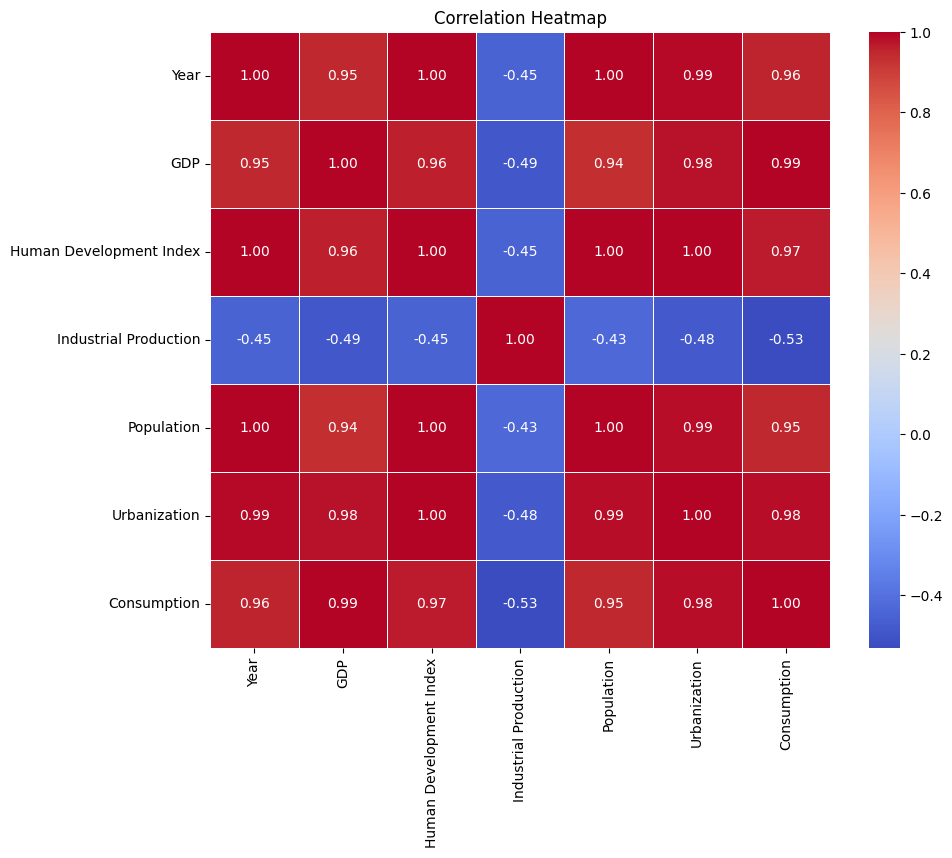

Linear Regression Mean Squared Error (Train): 141.23816330725276
Random Forest Mean Squared Error (Train): 189.61861457472423


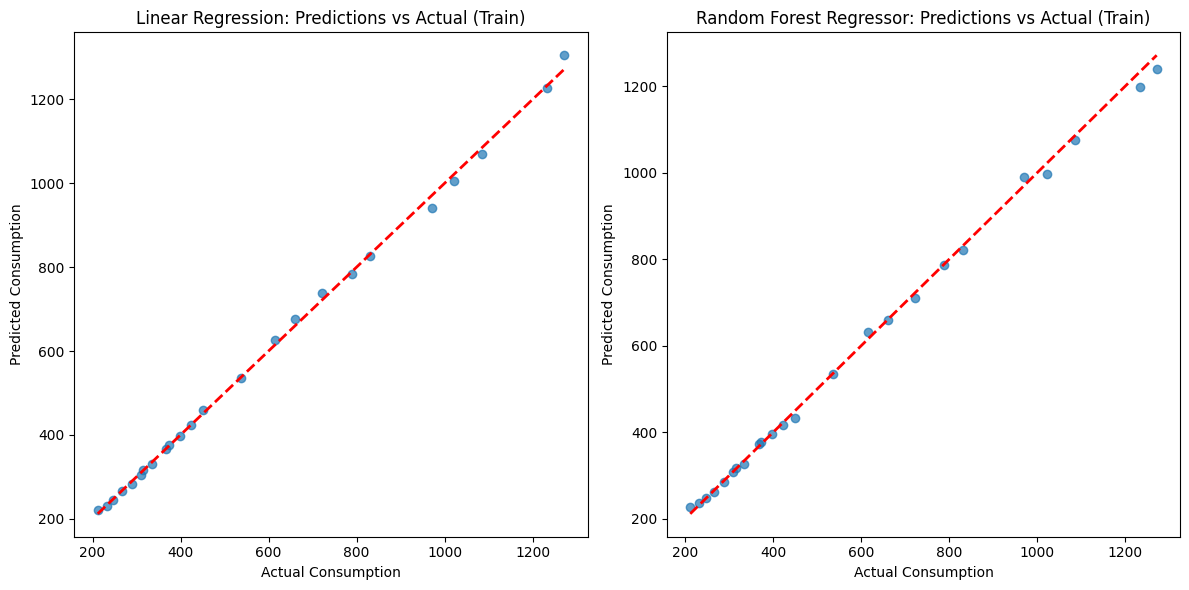

In [27]:

# Features and target
features = df_india[['Year', 'GDP', 'Human Development Index',
       'Industrial Production', 'Population', 'Urbanization']]
target = df_india['Consumption']

# Calculate the correlation matrix
correlation_matrix = pd.concat([features, target], axis=1).corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

# Make predictions
linear_pred = linear_reg.predict(X_train)
rf_pred = rf_reg.predict(X_train)

# Calculate Mean Squared Error
linear_mse = mean_squared_error(y_train, linear_pred)
rf_mse = mean_squared_error(y_train, rf_pred)

# Print Mean Squared Error
print(f'Linear Regression Mean Squared Error (Train): {linear_mse}')
print(f'Random Forest Mean Squared Error (Train): {rf_mse}')

# Plotting predictions vs actual for Linear Regression (Train)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, linear_pred, alpha=0.7)
plt.title('Linear Regression: Predictions vs Actual (Train)')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)

# Plotting predictions vs actual for Random Forest Regressor (Train)
plt.subplot(1, 2, 2)
plt.scatter(y_train, rf_pred, alpha=0.7)
plt.title('Random Forest Regressor: Predictions vs Actual (Train)')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)

plt.tight_layout()
plt.show()


Linear Regression Mean Squared Error (Test): 101.75956081456933
Random Forest Mean Squared Error (Test): 495.50391011456304


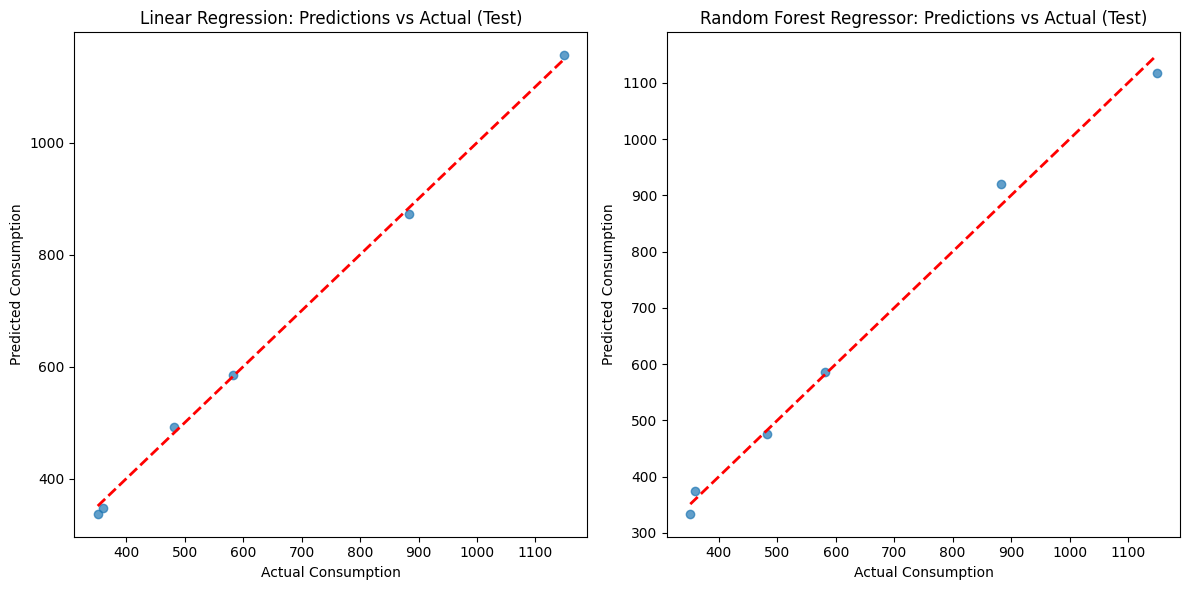

In [28]:
# Make predictions on the testing data
linear_pred_test = linear_reg.predict(X_test)
rf_pred_test = rf_reg.predict(X_test)

# Calculate Mean Squared Error on testing data
linear_mse_test = mean_squared_error(y_test, linear_pred_test)
rf_mse_test = mean_squared_error(y_test, rf_pred_test)

# Print Mean Squared Error on testing data
print(f'Linear Regression Mean Squared Error (Test): {linear_mse_test}')
print(f'Random Forest Mean Squared Error (Test): {rf_mse_test}')

# Plotting predictions vs actual for Linear Regression (Test)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, linear_pred_test, alpha=0.7)
plt.title('Linear Regression: Predictions vs Actual (Test)')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Plotting predictions vs actual for Random Forest Regressor (Test)
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_pred_test, alpha=0.7)
plt.title('Random Forest Regressor: Predictions vs Actual (Test)')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.tight_layout()
plt.show()

Linear Regression Mean Squared Error (Test): 101.75956081456933
Random Forest Mean Squared Error (Test): 495.50391011456304
SVM Mean Squared Error (Test): 123398.32001611589


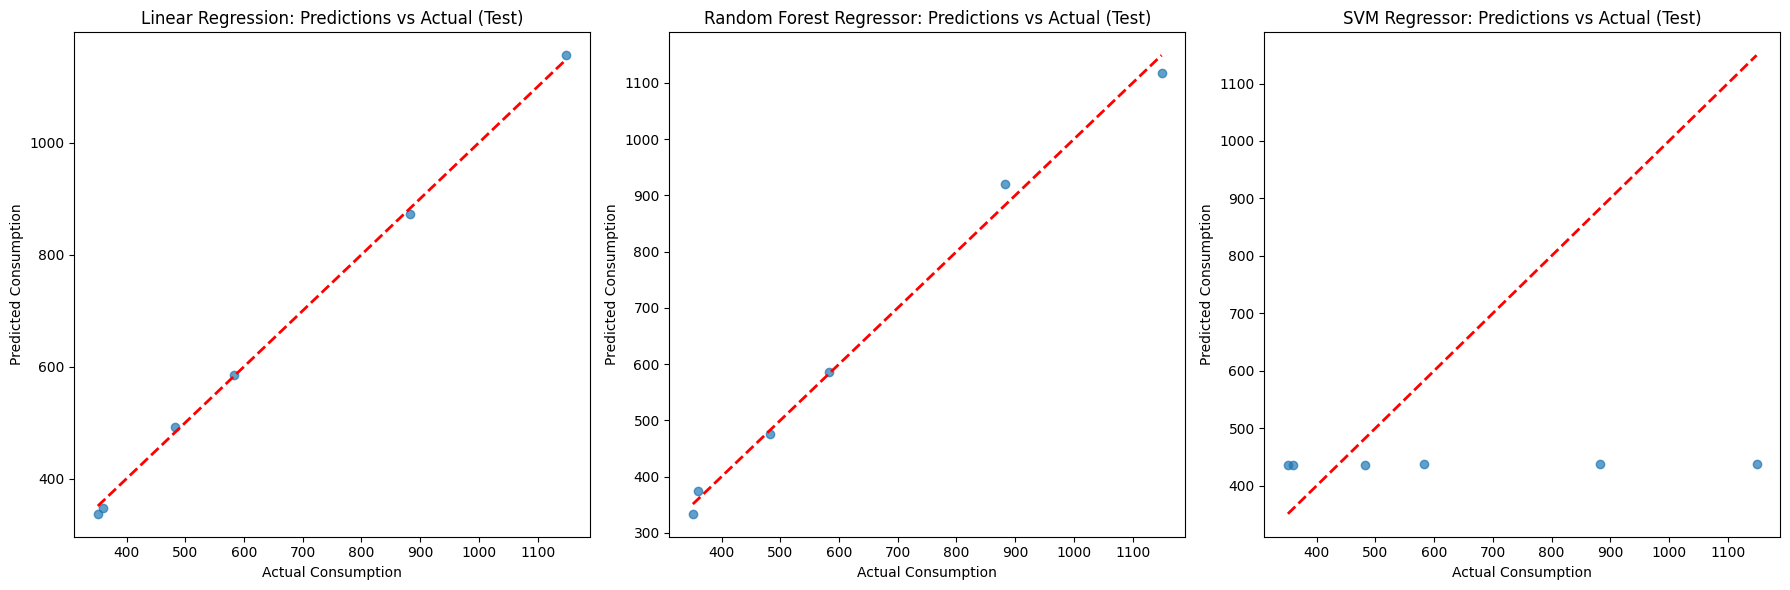

In [31]:


# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regressor
svm_reg = SVR()
svm_reg.fit(X_train, y_train)

# Make predictions
linear_pred = linear_reg.predict(X_test)
rf_pred = rf_reg.predict(X_test)
svm_pred = svm_reg.predict(X_test)

# Calculate Mean Squared Error
linear_mse = mean_squared_error(y_test, linear_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
svm_mse = mean_squared_error(y_test, svm_pred)

# Print Mean Squared Error
print(f'Linear Regression Mean Squared Error (Test): {linear_mse}')
print(f'Random Forest Mean Squared Error (Test): {rf_mse}')
print(f'SVM Mean Squared Error (Test): {svm_mse}')

# Plotting predictions vs actual for Linear Regression (Test)
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_pred, alpha=0.7)
plt.title('Linear Regression: Predictions vs Actual (Test)')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Plotting predictions vs actual for Random Forest Regressor (Test)
plt.subplot(1, 3, 2)
plt.scatter(y_test, rf_pred, alpha=0.7)
plt.title('Random Forest Regressor: Predictions vs Actual (Test)')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Plotting predictions vs actual for SVM Regressor (Test)
plt.subplot(1, 3, 3)
plt.scatter(y_test, svm_pred, alpha=0.7)
plt.title('SVM Regressor: Predictions vs Actual (Test)')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.tight_layout()
plt.show()

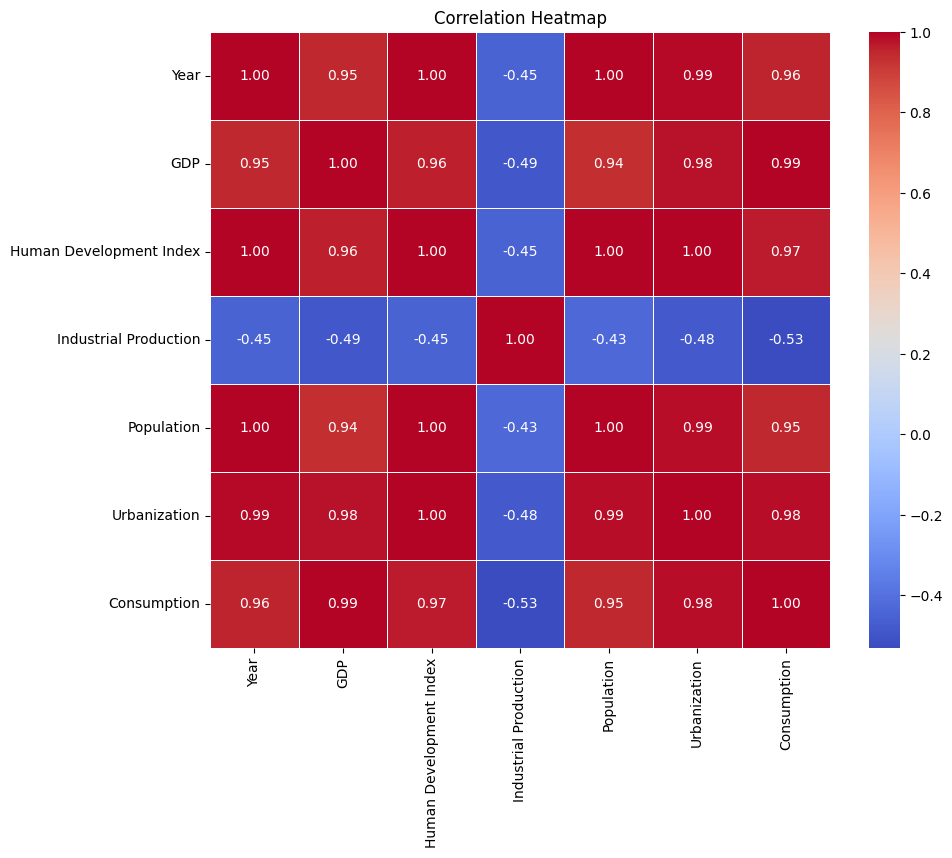

LinearRegression Mean Squared Error (Train): 141.23816330725276
RandomForestRegressor Mean Squared Error (Train): 189.61861457472423
GradientBoostingRegressor Mean Squared Error (Train): 0.00011768645950438488
SVR Mean Squared Error (Train): 127167.67578820419
DecisionTreeRegressor Mean Squared Error (Train): 0.0


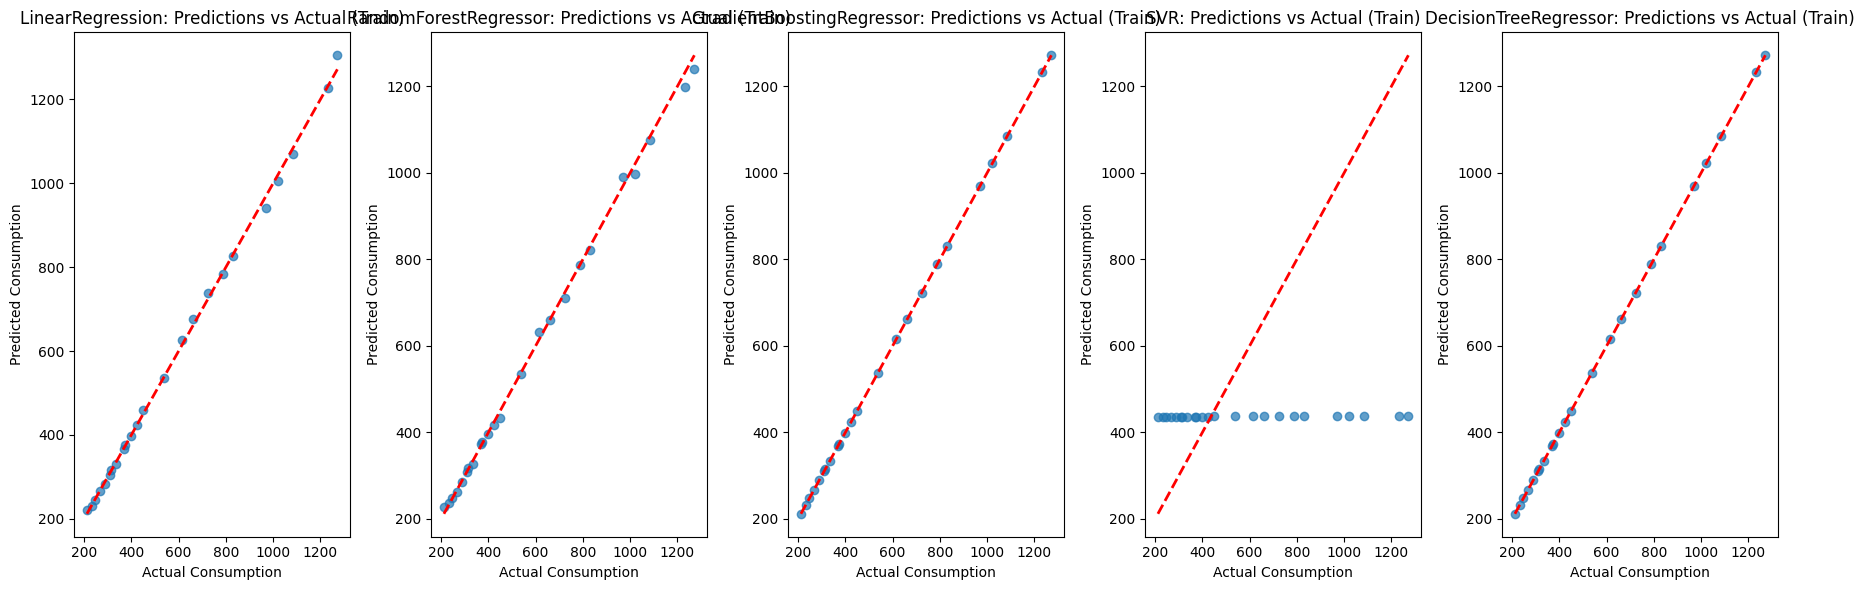

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assume df_india is your DataFrame containing the relevant data

# Features and target
features = df_india[['Year', 'GDP', 'Human Development Index',
                     'Industrial Production', 'Population', 'Urbanization']]
target = df_india['Consumption']

# Calculate the correlation matrix
correlation_matrix = pd.concat([features, target], axis=1).corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
svr_reg = SVR()
dt_reg = DecisionTreeRegressor(random_state=42)

# List of models for iteration
models = [linear_reg, rf_reg, gb_reg, svr_reg, dt_reg]

# Train and evaluate models
for model in models:
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, pred_train)
    print(f'{model.__class__.__name__} Mean Squared Error (Train): {mse_train}')

# Plotting predictions vs actual for all models (Train)
plt.figure(figsize=(18, 6))

for i, model in enumerate(models, start=1):
    plt.subplot(1, len(models), i)
    pred_train = model.predict(X_train)
    plt.scatter(y_train, pred_train, alpha=0.7)
    plt.title(f'{model.__class__.__name__}: Predictions vs Actual (Train)')
    plt.xlabel('Actual Consumption')
    plt.ylabel('Predicted Consumption')
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)

plt.tight_layout()
plt.show()


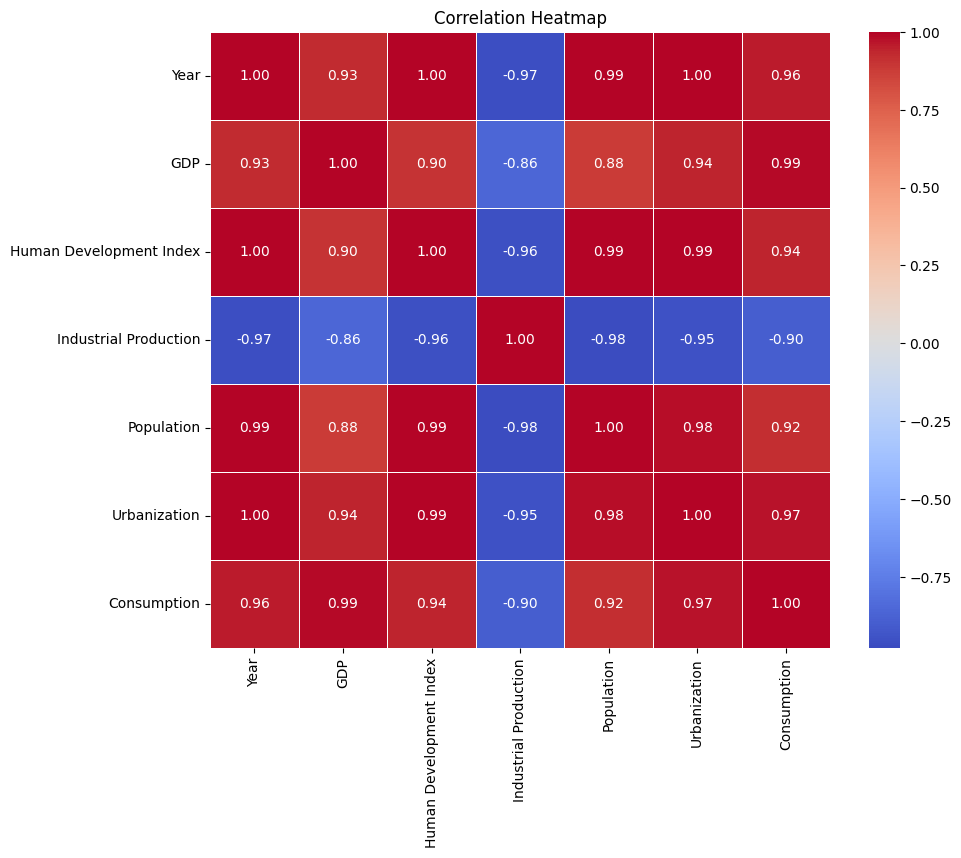

LinearRegression Mean Squared Error (Train): 6216.895224596045
RandomForestRegressor Mean Squared Error (Train): 5769.88859399404
GradientBoostingRegressor Mean Squared Error (Train): 0.004238793342834102
SVR Mean Squared Error (Train): 4683170.125167812
DecisionTreeRegressor Mean Squared Error (Train): 0.0


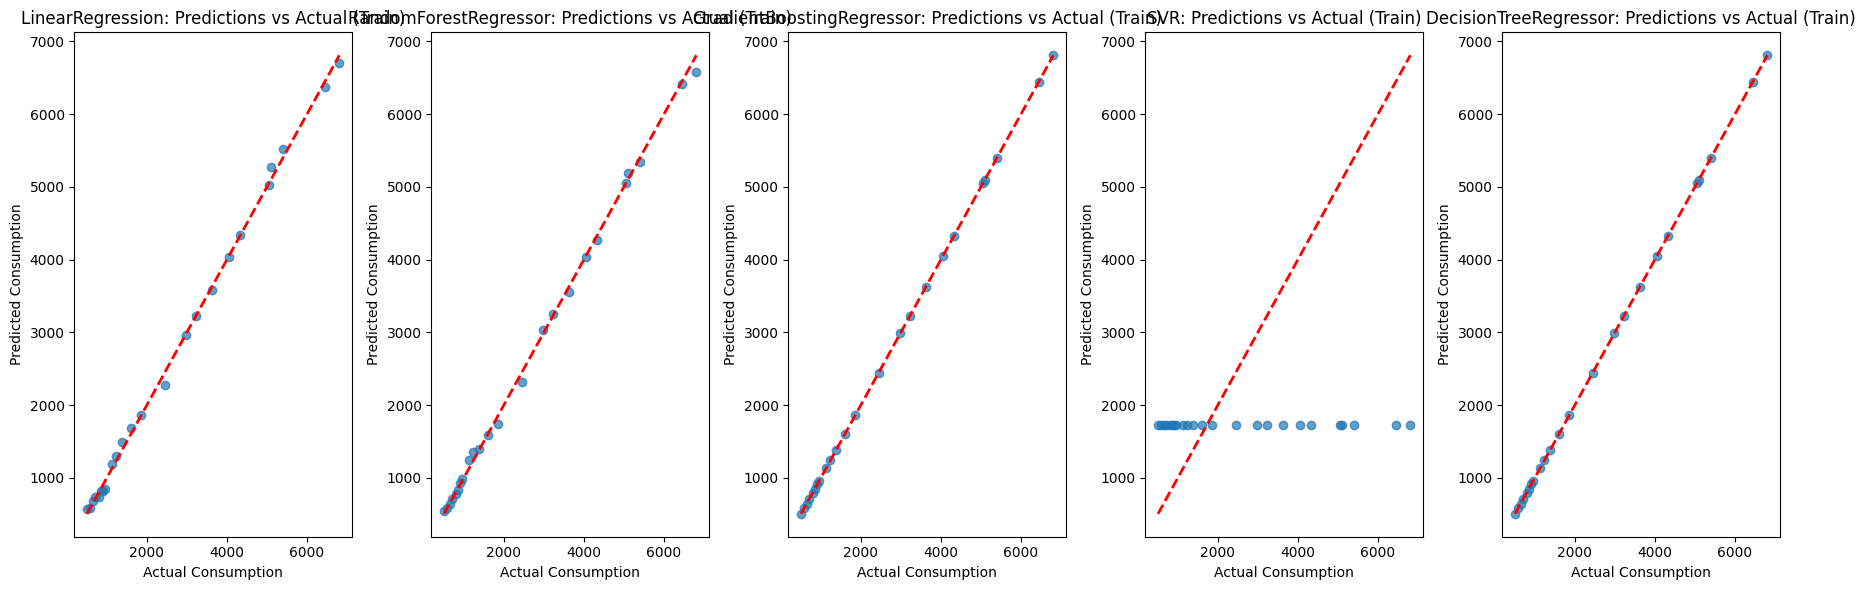

In [17]:
# Features and target
features = df_china[['Year', 'GDP', 'Human Development Index',
                     'Industrial Production', 'Population', 'Urbanization']]
target = df_china['Consumption']

# Calculate the correlation matrix
correlation_matrix = pd.concat([features, target], axis=1).corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
svr_reg = SVR()
dt_reg = DecisionTreeRegressor(random_state=42)

# List of models for iteration
models = [linear_reg, rf_reg, gb_reg, svr_reg, dt_reg]

# Train and evaluate models
for model in models:
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, pred_train)
    print(f'{model.__class__.__name__} Mean Squared Error (Train): {mse_train}')

# Plotting predictions vs actual for all models (Train)
plt.figure(figsize=(18, 6))

for i, model in enumerate(models, start=1):
    plt.subplot(1, len(models), i)
    pred_train = model.predict(X_train)
    plt.scatter(y_train, pred_train, alpha=0.7)
    plt.title(f'{model.__class__.__name__}: Predictions vs Actual (Train)')
    plt.xlabel('Actual Consumption')
    plt.ylabel('Predicted Consumption')
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)

plt.tight_layout()
plt.show()


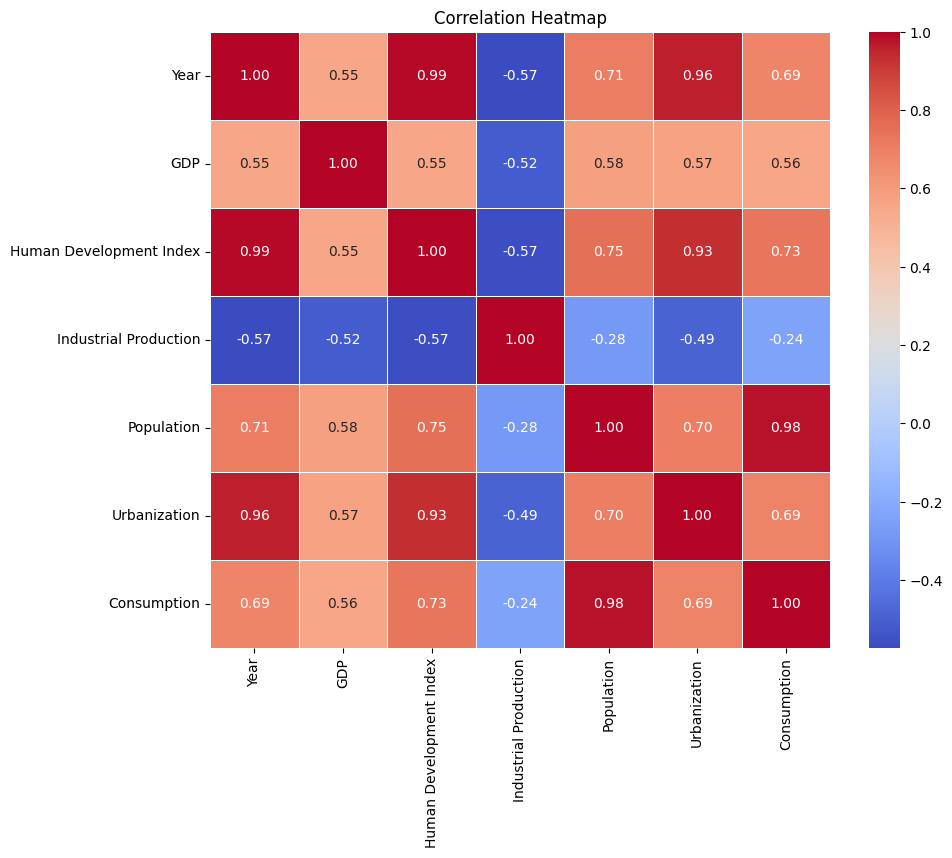

LinearRegression Mean Squared Error (Train): 177.62558305045982
RandomForestRegressor Mean Squared Error (Train): 66.500665936792
GradientBoostingRegressor Mean Squared Error (Train): 0.053390391975987696
SVR Mean Squared Error (Train): 6949.951638360905
DecisionTreeRegressor Mean Squared Error (Train): 0.0


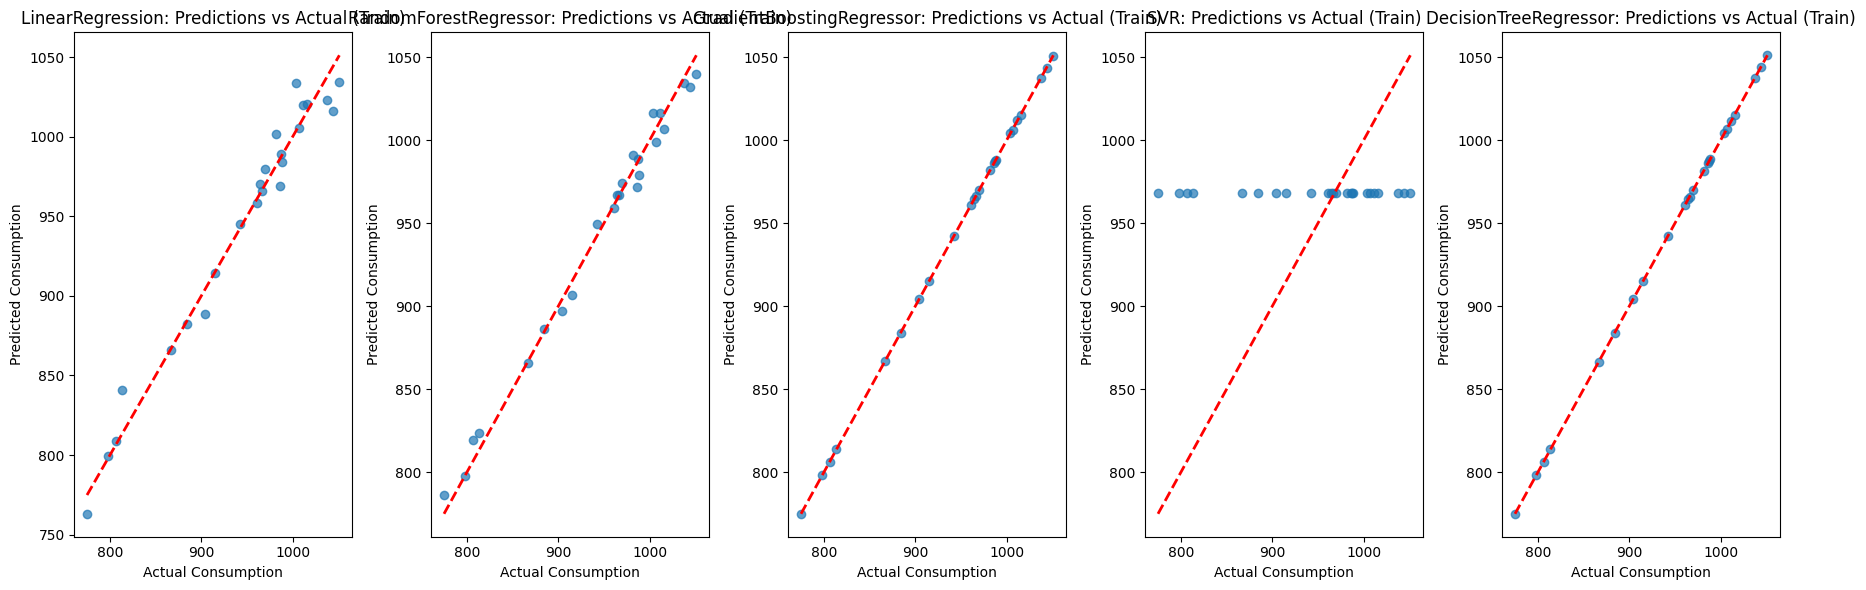

In [18]:
# Features and target
features = df_japan[['Year', 'GDP', 'Human Development Index',
                     'Industrial Production', 'Population', 'Urbanization']]
target = df_japan['Consumption']

# Calculate the correlation matrix
correlation_matrix = pd.concat([features, target], axis=1).corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
svr_reg = SVR()
dt_reg = DecisionTreeRegressor(random_state=42)

# List of models for iteration
models = [linear_reg, rf_reg, gb_reg, svr_reg, dt_reg]

# Train and evaluate models
for model in models:
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, pred_train)
    print(f'{model.__class__.__name__} Mean Squared Error (Train): {mse_train}')

# Plotting predictions vs actual for all models (Train)
plt.figure(figsize=(18, 6))

for i, model in enumerate(models, start=1):
    plt.subplot(1, len(models), i)
    pred_train = model.predict(X_train)
    plt.scatter(y_train, pred_train, alpha=0.7)
    plt.title(f'{model.__class__.__name__}: Predictions vs Actual (Train)')
    plt.xlabel('Actual Consumption')
    plt.ylabel('Predicted Consumption')
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)

plt.tight_layout()
plt.show()


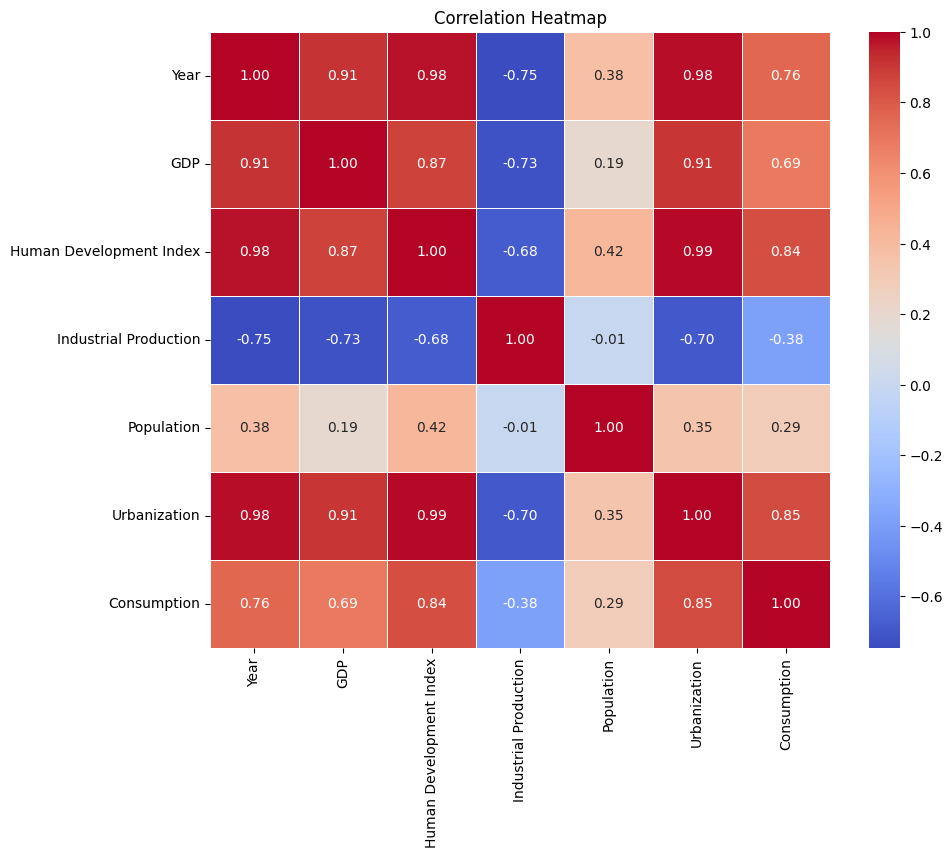

LinearRegression Mean Squared Error (Train): 85.6175492864312
RandomForestRegressor Mean Squared Error (Train): 17.418229280694774
GradientBoostingRegressor Mean Squared Error (Train): 0.005688755338114693
SVR Mean Squared Error (Train): 795.0463599670346
DecisionTreeRegressor Mean Squared Error (Train): 0.0


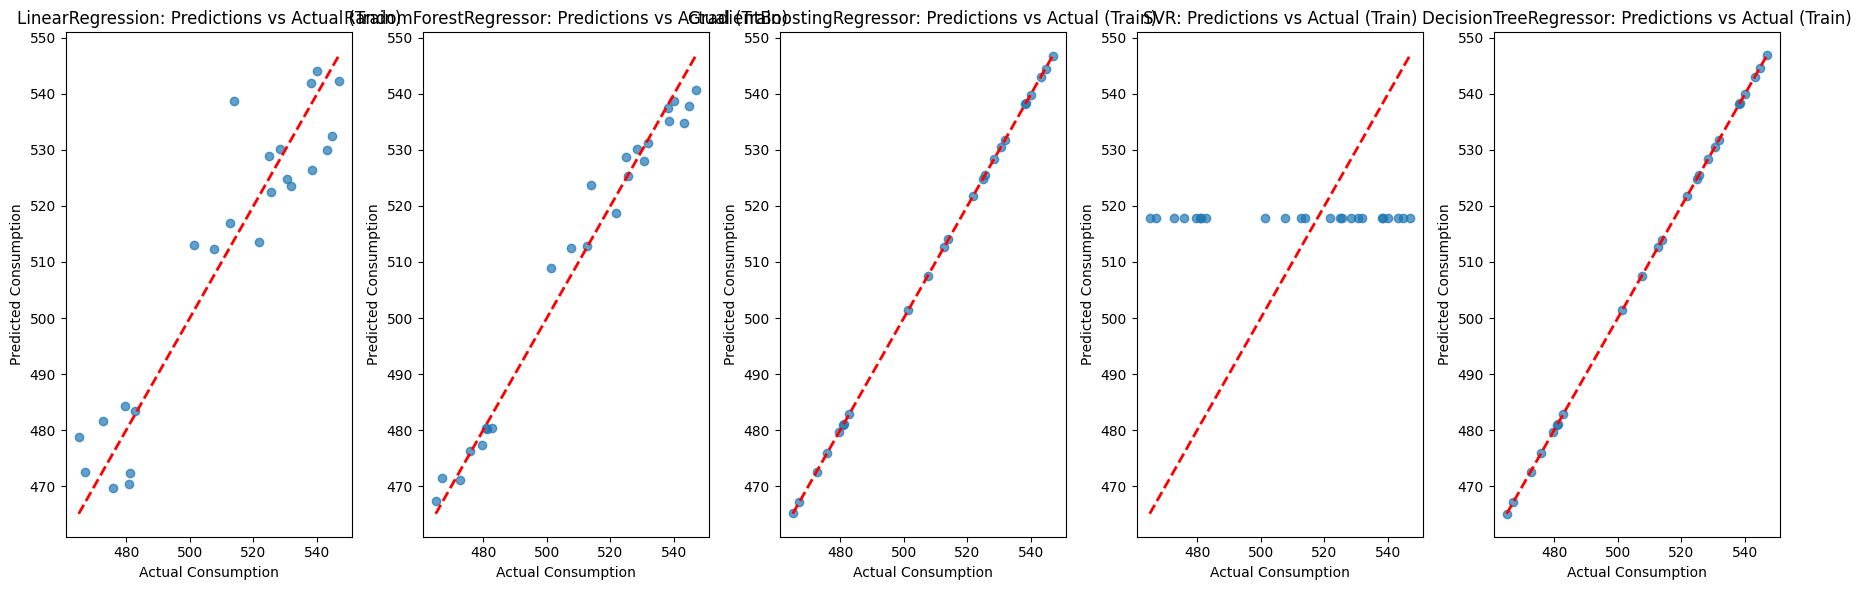

In [19]:
features = df_germany[['Year', 'GDP', 'Human Development Index',
                     'Industrial Production', 'Population', 'Urbanization']]
target = df_germany['Consumption']

# Calculate the correlation matrix
correlation_matrix = pd.concat([features, target], axis=1).corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
svr_reg = SVR()
dt_reg = DecisionTreeRegressor(random_state=42)

# List of models for iteration
models = [linear_reg, rf_reg, gb_reg, svr_reg, dt_reg]

# Train and evaluate models
for model in models:
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, pred_train)
    print(f'{model.__class__.__name__} Mean Squared Error (Train): {mse_train}')

# Plotting predictions vs actual for all models (Train)
plt.figure(figsize=(18, 6))

for i, model in enumerate(models, start=1):
    plt.subplot(1, len(models), i)
    pred_train = model.predict(X_train)
    plt.scatter(y_train, pred_train, alpha=0.7)
    plt.title(f'{model.__class__.__name__}: Predictions vs Actual (Train)')
    plt.xlabel('Actual Consumption')
    plt.ylabel('Predicted Consumption')
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)

plt.tight_layout()
plt.show()


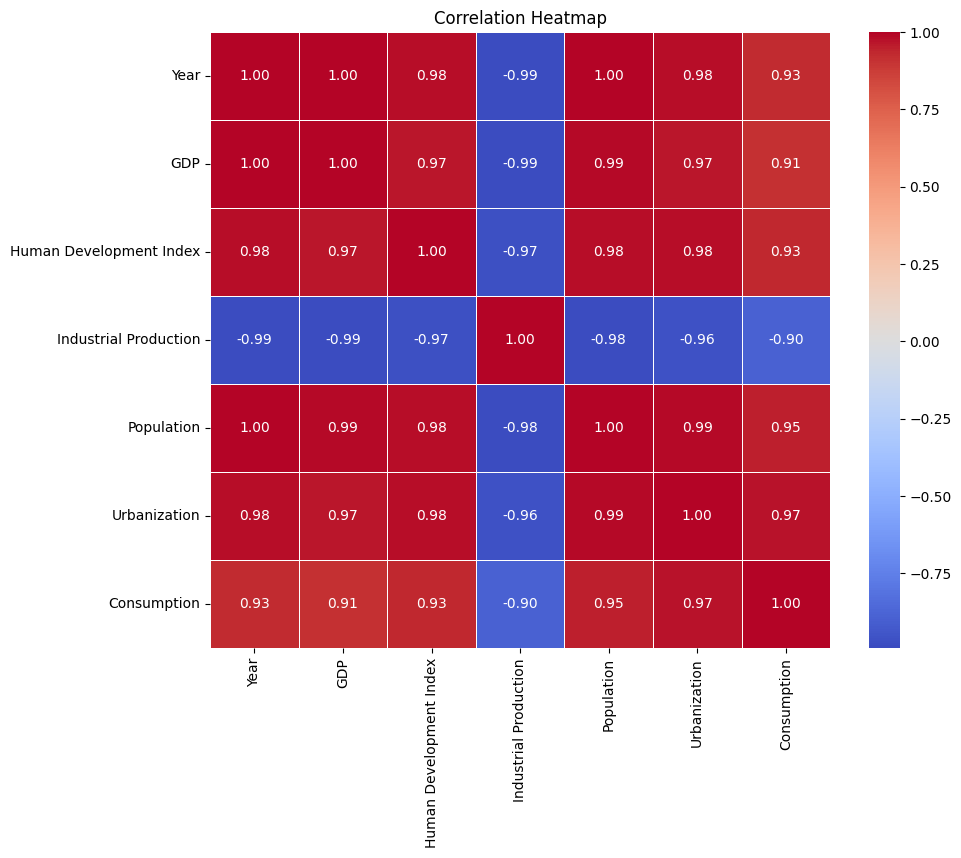

LinearRegression Mean Squared Error (Train): 1241.116446226134
RandomForestRegressor Mean Squared Error (Train): 705.6236286929822
GradientBoostingRegressor Mean Squared Error (Train): 0.7803014510087692
SVR Mean Squared Error (Train): 187571.25972696862
DecisionTreeRegressor Mean Squared Error (Train): 0.0


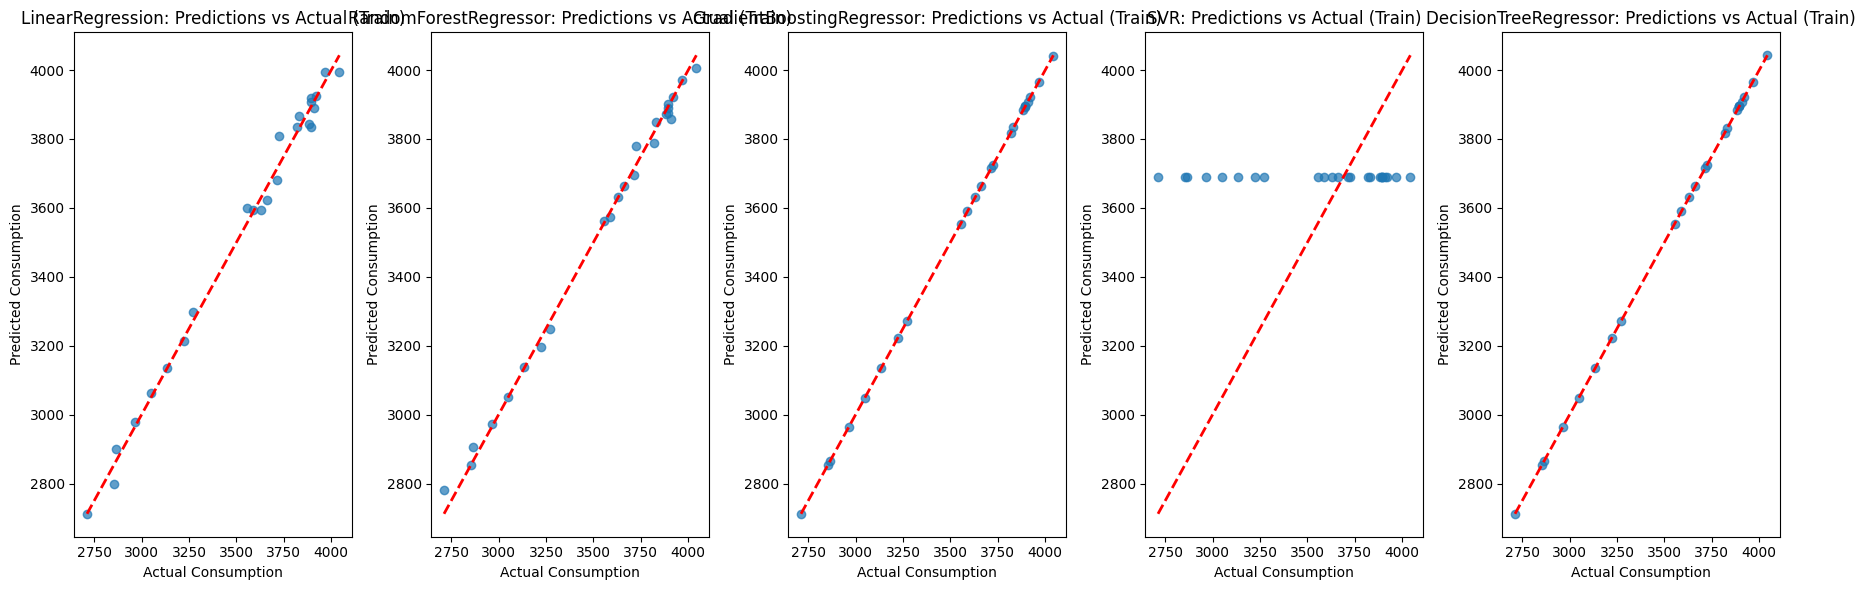

In [20]:
features = df_us[['Year', 'GDP', 'Human Development Index',
                     'Industrial Production', 'Population', 'Urbanization']]
target = df_us['Consumption']

# Calculate the correlation matrix
correlation_matrix = pd.concat([features, target], axis=1).corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
svr_reg = SVR()
dt_reg = DecisionTreeRegressor(random_state=42)

# List of models for iteration
models = [linear_reg, rf_reg, gb_reg, svr_reg, dt_reg]

# Train and evaluate models
for model in models:
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, pred_train)
    print(f'{model.__class__.__name__} Mean Squared Error (Train): {mse_train}')

# Plotting predictions vs actual for all models (Train)
plt.figure(figsize=(18, 6))

for i, model in enumerate(models, start=1):
    plt.subplot(1, len(models), i)
    pred_train = model.predict(X_train)
    plt.scatter(y_train, pred_train, alpha=0.7)
    plt.title(f'{model.__class__.__name__}: Predictions vs Actual (Train)')
    plt.xlabel('Actual Consumption')
    plt.ylabel('Predicted Consumption')
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)

plt.tight_layout()
plt.show()


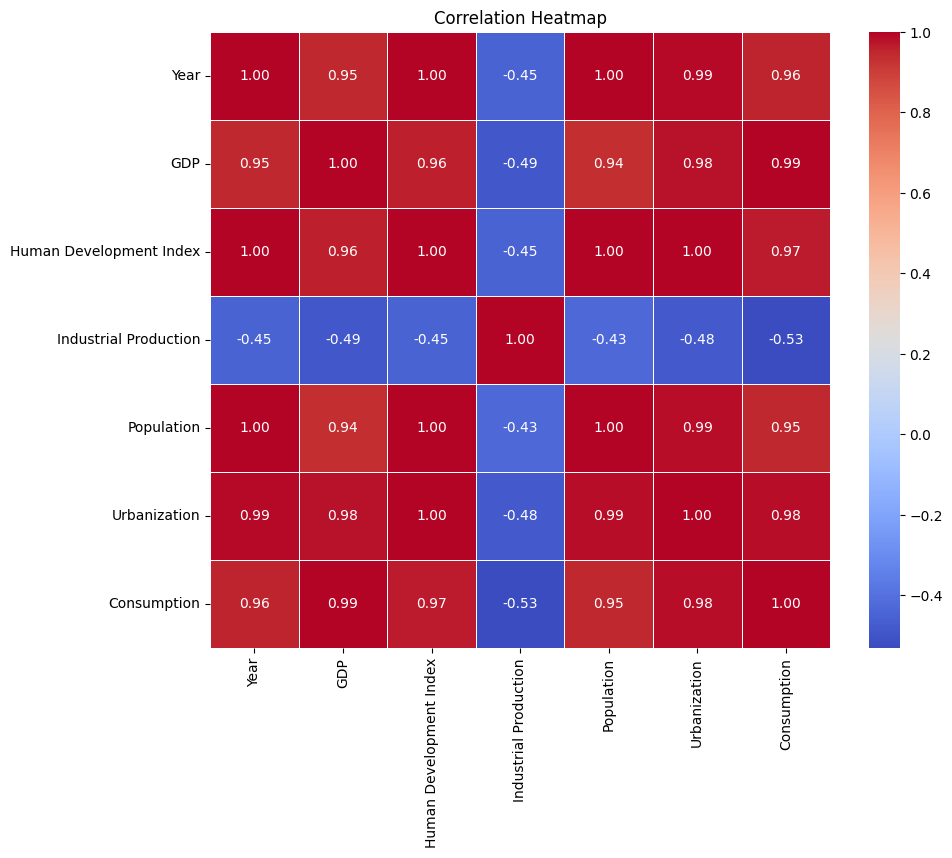

LinearRegression Mean Squared Error (Test): 101.75956081456933
RandomForestRegressor Mean Squared Error (Test): 495.50391011456304
GradientBoostingRegressor Mean Squared Error (Test): 397.14961060861356
SVR Mean Squared Error (Test): 123398.32001611589
DecisionTreeRegressor Mean Squared Error (Test): 2854.0052702572552


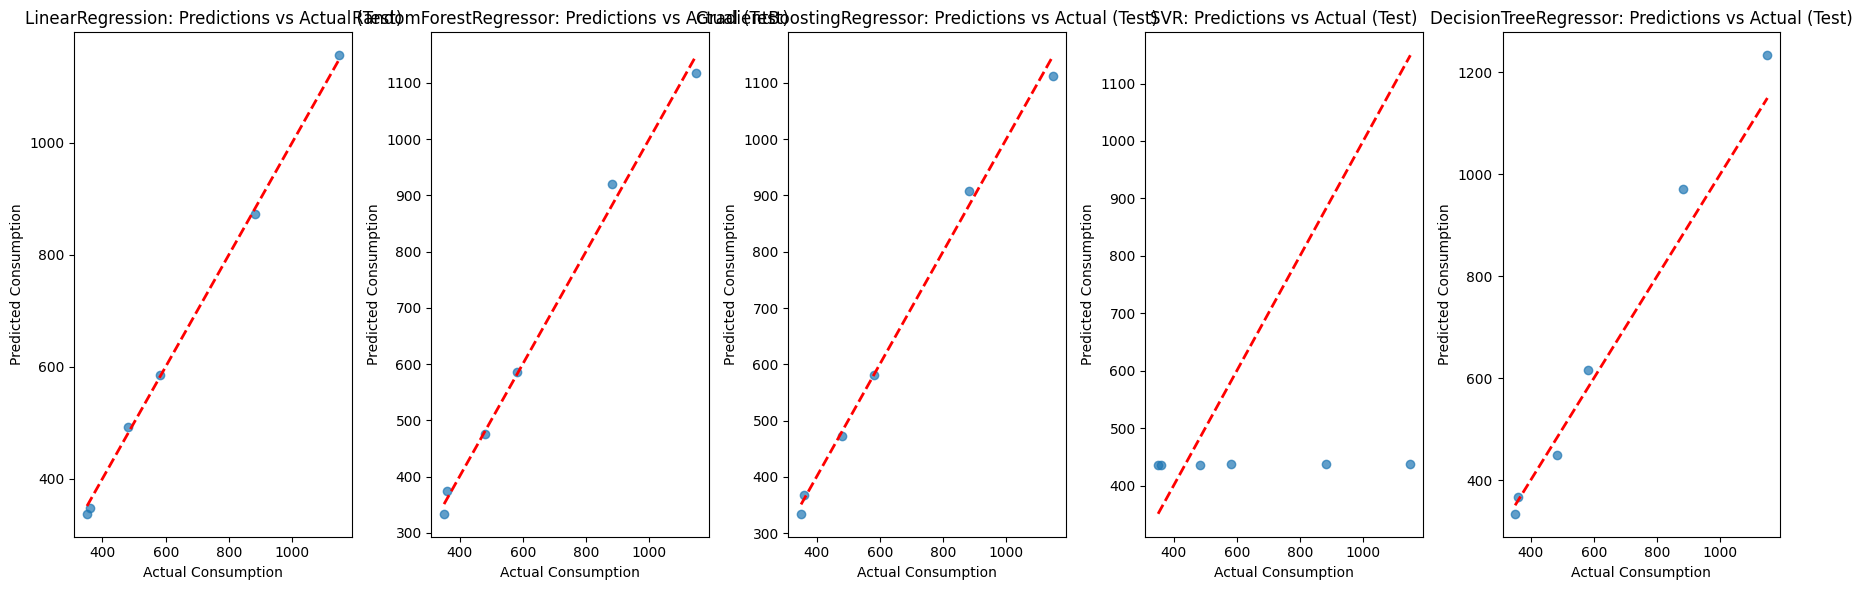

In [21]:
features = df_india[['Year', 'GDP', 'Human Development Index',
                     'Industrial Production', 'Population', 'Urbanization']]
target = df_india['Consumption']

# Calculate the correlation matrix
correlation_matrix = pd.concat([features, target], axis=1).corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
svr_reg = SVR()
dt_reg = DecisionTreeRegressor(random_state=42)

# List of models for iteration
models = [linear_reg, rf_reg, gb_reg, svr_reg, dt_reg]

# Train and evaluate models on the test set
for model in models:
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, pred_test)
    print(f'{model.__class__.__name__} Mean Squared Error (Test): {mse_test}')

# Plotting predictions vs actual for all models (Test)
plt.figure(figsize=(18, 6))

for i, model in enumerate(models, start=1):
    plt.subplot(1, len(models), i)
    pred_test = model.predict(X_test)
    plt.scatter(y_test, pred_test, alpha=0.7)
    plt.title(f'{model.__class__.__name__}: Predictions vs Actual (Test)')
    plt.xlabel('Actual Consumption')
    plt.ylabel('Predicted Consumption')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.tight_layout()
plt.show()


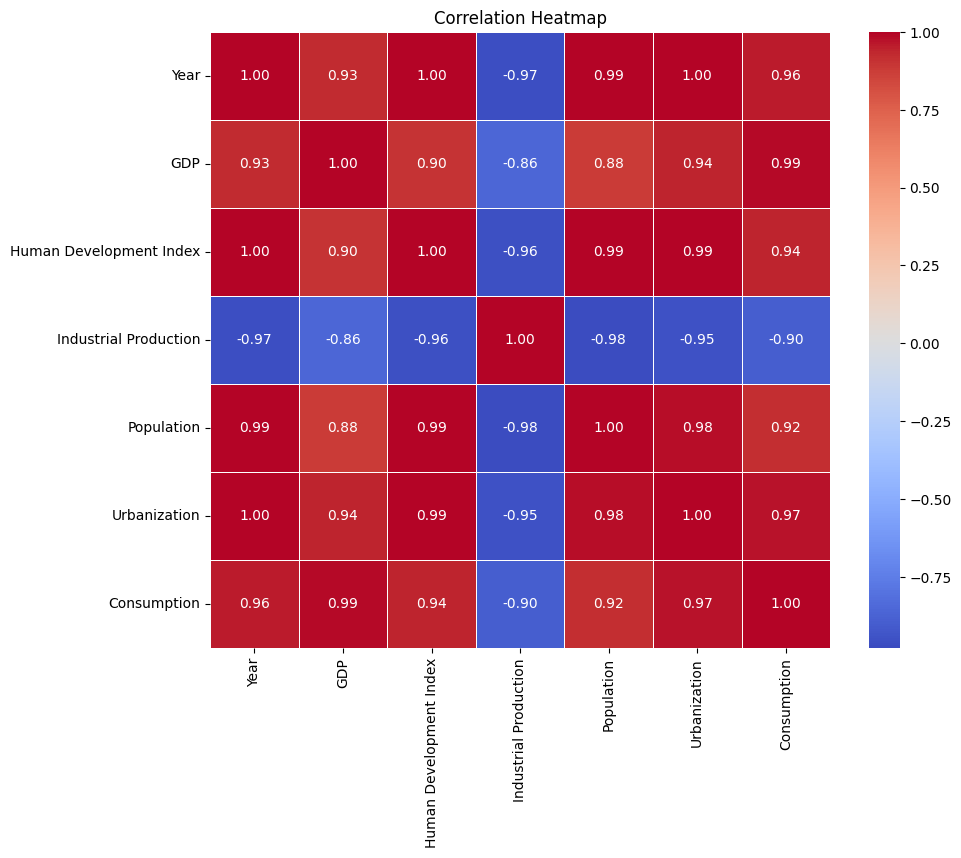

LinearRegression Mean Squared Error (Test): 9385.446436637218
RandomForestRegressor Mean Squared Error (Test): 12005.780558500692
GradientBoostingRegressor Mean Squared Error (Test): 13118.2806804021
SVR Mean Squared Error (Test): 4746528.7254853835
DecisionTreeRegressor Mean Squared Error (Test): 96146.49027999998


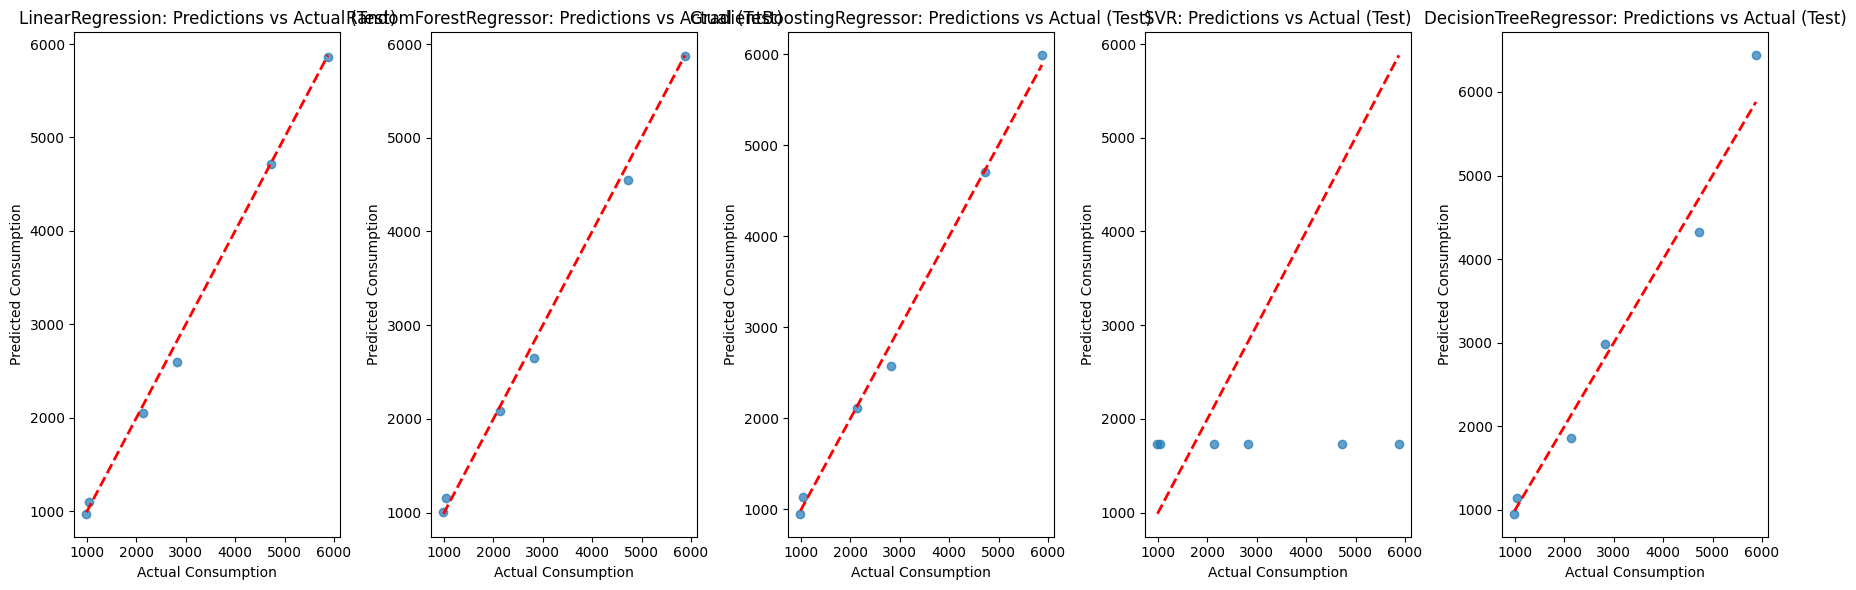

In [22]:
features = df_china[['Year', 'GDP', 'Human Development Index',
                     'Industrial Production', 'Population', 'Urbanization']]
target = df_china['Consumption']

# Calculate the correlation matrix
correlation_matrix = pd.concat([features, target], axis=1).corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
svr_reg = SVR()
dt_reg = DecisionTreeRegressor(random_state=42)

# List of models for iteration
models = [linear_reg, rf_reg, gb_reg, svr_reg, dt_reg]

# Train and evaluate models on the test set
for model in models:
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, pred_test)
    print(f'{model.__class__.__name__} Mean Squared Error (Test): {mse_test}')

# Plotting predictions vs actual for all models (Test)
plt.figure(figsize=(18, 6))

for i, model in enumerate(models, start=1):
    plt.subplot(1, len(models), i)
    pred_test = model.predict(X_test)
    plt.scatter(y_test, pred_test, alpha=0.7)
    plt.title(f'{model.__class__.__name__}: Predictions vs Actual (Test)')
    plt.xlabel('Actual Consumption')
    plt.ylabel('Predicted Consumption')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.tight_layout()
plt.show()


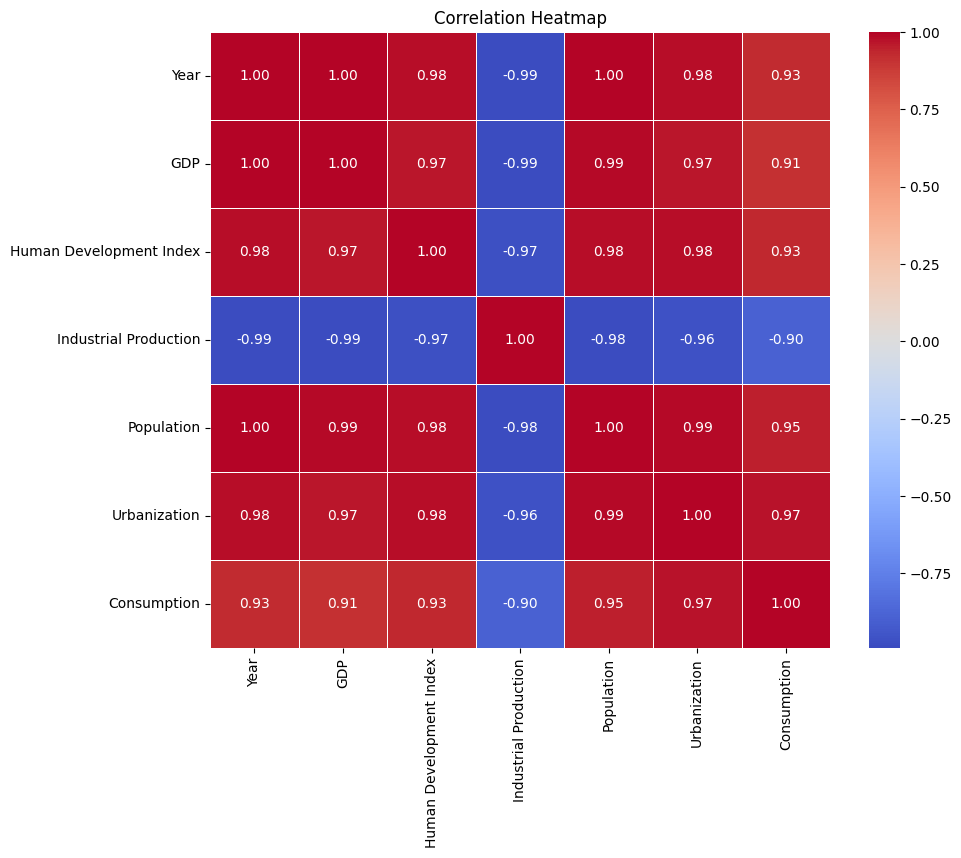

LinearRegression Mean Squared Error (Test): 1701.5371283556021
RandomForestRegressor Mean Squared Error (Test): 7308.952351168361
GradientBoostingRegressor Mean Squared Error (Test): 8652.257295571724
SVR Mean Squared Error (Test): 48838.31601435757
DecisionTreeRegressor Mean Squared Error (Test): 12252.479638719386


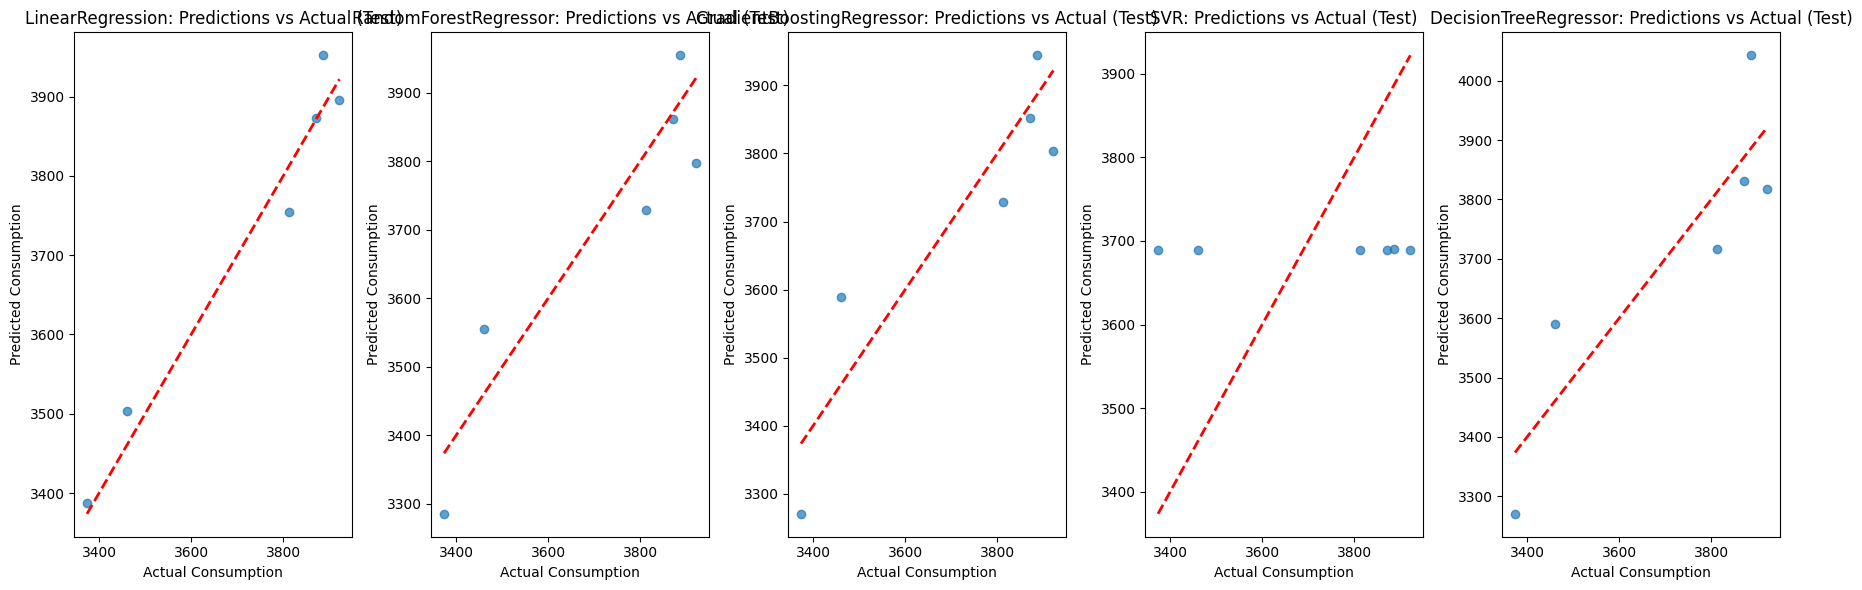

In [23]:
features = df_us[['Year', 'GDP', 'Human Development Index',
                     'Industrial Production', 'Population', 'Urbanization']]
target = df_us['Consumption']

# Calculate the correlation matrix
correlation_matrix = pd.concat([features, target], axis=1).corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
svr_reg = SVR()
dt_reg = DecisionTreeRegressor(random_state=42)

# List of models for iteration
models = [linear_reg, rf_reg, gb_reg, svr_reg, dt_reg]

# Train and evaluate models on the test set
for model in models:
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, pred_test)
    print(f'{model.__class__.__name__} Mean Squared Error (Test): {mse_test}')

# Plotting predictions vs actual for all models (Test)
plt.figure(figsize=(18, 6))

for i, model in enumerate(models, start=1):
    plt.subplot(1, len(models), i)
    pred_test = model.predict(X_test)
    plt.scatter(y_test, pred_test, alpha=0.7)
    plt.title(f'{model.__class__.__name__}: Predictions vs Actual (Test)')
    plt.xlabel('Actual Consumption')
    plt.ylabel('Predicted Consumption')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.tight_layout()
plt.show()


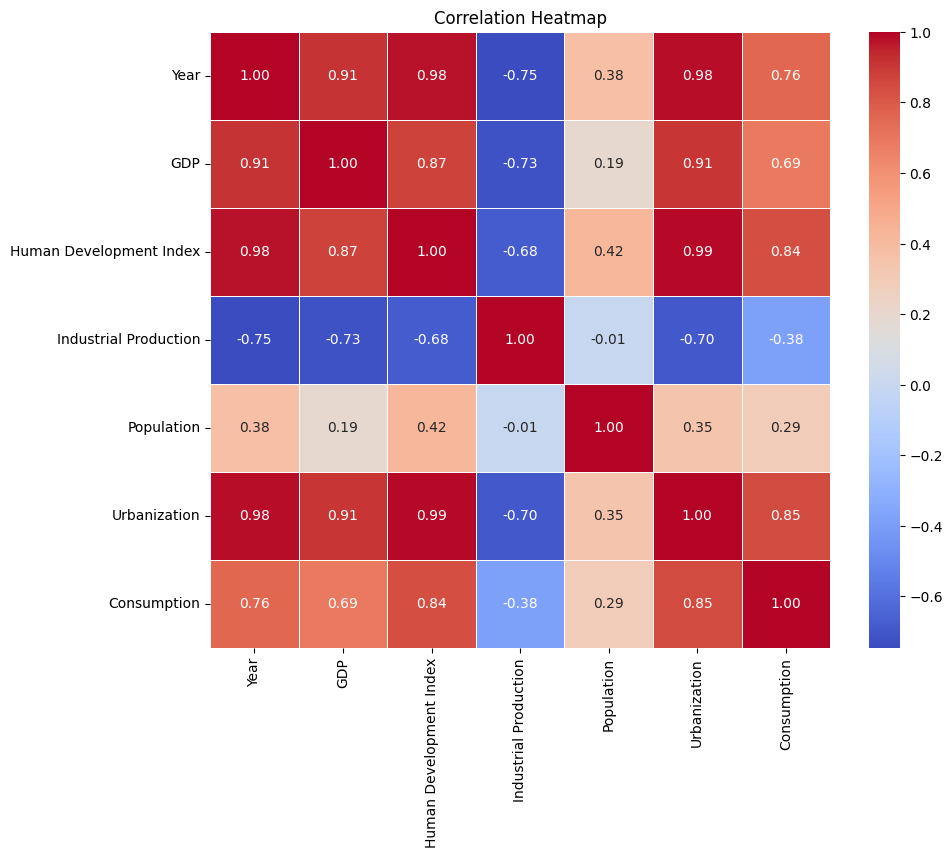

LinearRegression Mean Squared Error (Test): 123.94761230364104
RandomForestRegressor Mean Squared Error (Test): 54.90562318673051
GradientBoostingRegressor Mean Squared Error (Test): 46.3907431604546
SVR Mean Squared Error (Test): 571.234530453819
DecisionTreeRegressor Mean Squared Error (Test): 60.721101333333536


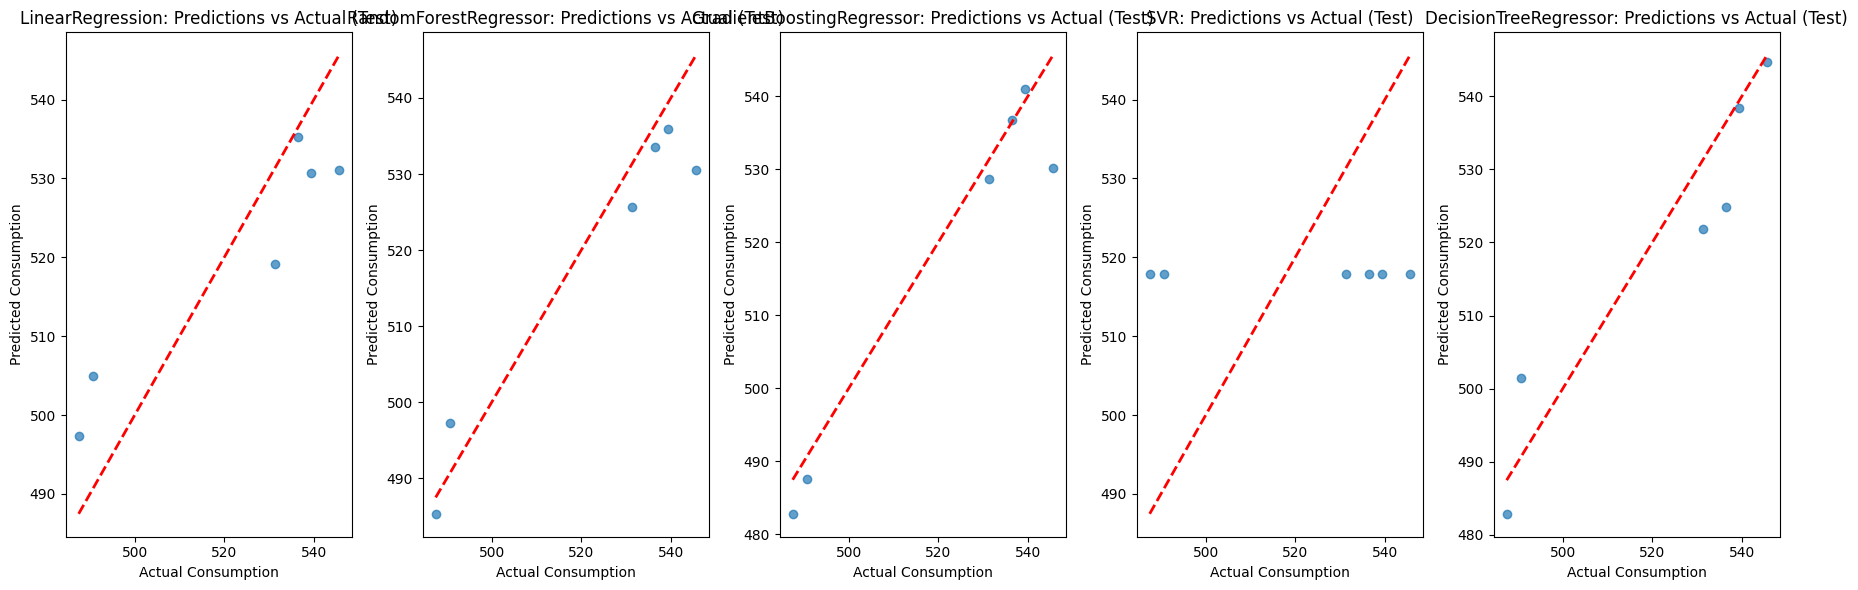

In [24]:
features = df_germany[['Year', 'GDP', 'Human Development Index',
                     'Industrial Production', 'Population', 'Urbanization']]
target = df_germany['Consumption']

# Calculate the correlation matrix
correlation_matrix = pd.concat([features, target], axis=1).corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
svr_reg = SVR()
dt_reg = DecisionTreeRegressor(random_state=42)

# List of models for iteration
models = [linear_reg, rf_reg, gb_reg, svr_reg, dt_reg]

# Train and evaluate models on the test set
for model in models:
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, pred_test)
    print(f'{model.__class__.__name__} Mean Squared Error (Test): {mse_test}')

# Plotting predictions vs actual for all models (Test)
plt.figure(figsize=(18, 6))

for i, model in enumerate(models, start=1):
    plt.subplot(1, len(models), i)
    pred_test = model.predict(X_test)
    plt.scatter(y_test, pred_test, alpha=0.7)
    plt.title(f'{model.__class__.__name__}: Predictions vs Actual (Test)')
    plt.xlabel('Actual Consumption')
    plt.ylabel('Predicted Consumption')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.tight_layout()
plt.show()


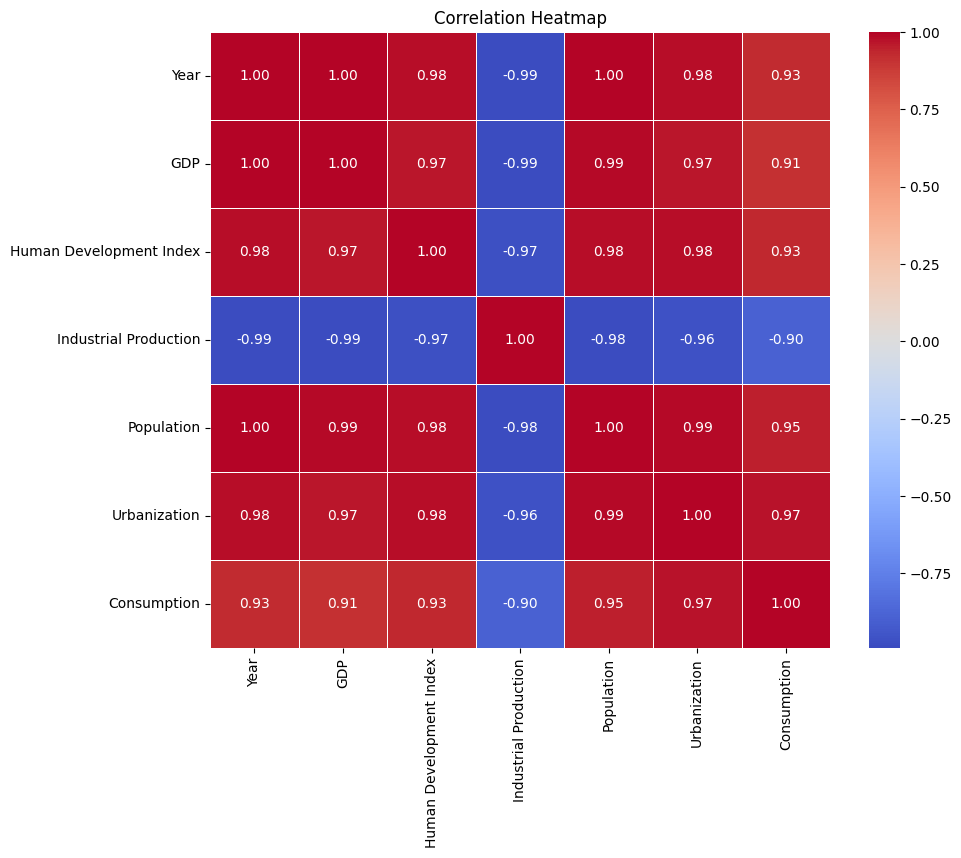

LinearRegression Mean Squared Error (Test): 1701.5371283556021
RandomForestRegressor Mean Squared Error (Test): 7308.952351168361
GradientBoostingRegressor Mean Squared Error (Test): 8652.257295571724
SVR Mean Squared Error (Test): 48838.31601435757
DecisionTreeRegressor Mean Squared Error (Test): 12252.479638719386


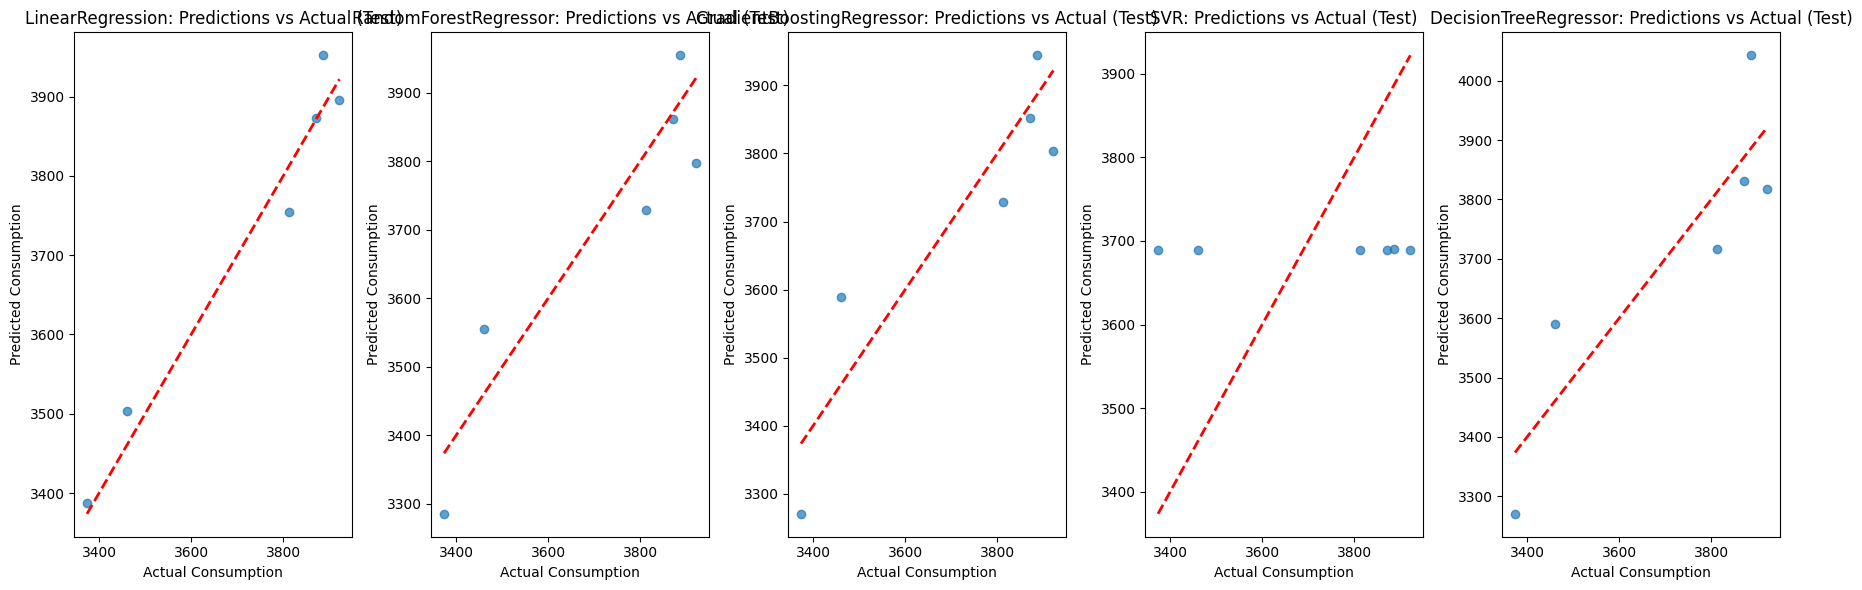

In [25]:
features = df_us[['Year', 'GDP', 'Human Development Index',
                     'Industrial Production', 'Population', 'Urbanization']]
target = df_us['Consumption']

# Calculate the correlation matrix
correlation_matrix = pd.concat([features, target], axis=1).corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
svr_reg = SVR()
dt_reg = DecisionTreeRegressor(random_state=42)

# List of models for iteration
models = [linear_reg, rf_reg, gb_reg, svr_reg, dt_reg]

# Train and evaluate models on the test set
for model in models:
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, pred_test)
    print(f'{model.__class__.__name__} Mean Squared Error (Test): {mse_test}')

# Plotting predictions vs actual for all models (Test)
plt.figure(figsize=(18, 6))

for i, model in enumerate(models, start=1):
    plt.subplot(1, len(models), i)
    pred_test = model.predict(X_test)
    plt.scatter(y_test, pred_test, alpha=0.7)
    plt.title(f'{model.__class__.__name__}: Predictions vs Actual (Test)')
    plt.xlabel('Actual Consumption')
    plt.ylabel('Predicted Consumption')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.tight_layout()
plt.show()
